In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Churn.csv')

In [ ]:
X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
y_train.head()

In [6]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [7]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\dinol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7222 - loss: 0.5415
Epoch 2/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7616 - loss: 0.4927
Epoch 3/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.4820
Epoch 4/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7800 - loss: 0.4761
Epoch 5/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.4890
Epoch 6/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7767 - loss: 0.4813
Epoch 7/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7817 - loss: 0.4660
Epoch 8/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7811 - loss: 0.4637
Epoch 9/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.4621
Epoch 10/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4660
Epoch 11/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4498
Epoch 12/200
177/177 ━━━━━━━━━━━━━━━━━━━━

In [10]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [11]:
accuracy_score(y_test, y_hat)

0.6252661462029808

In [12]:
model.save('model.h5')

In [13]:
predictions = model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [14]:
import numpy as np

# Convert probabilities to binary predictions
predicted_churn = np.where(predictions > 0.5, 1, 0).flatten()

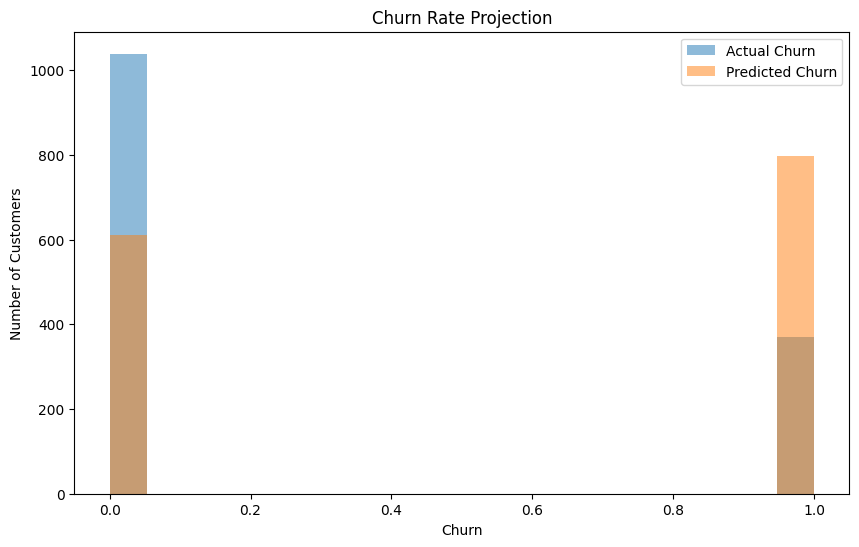

In [15]:
import matplotlib.pyplot as plt

# Calculate the number of bins for the histogram
bins = np.linspace(0, 1, 20)

plt.figure(figsize=(10, 6))
plt.hist(y_test, bins, alpha=0.5, label='Actual Churn')
plt.hist(predicted_churn, bins, alpha=0.5, label='Predicted Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Churn Rate Projection')
plt.legend(loc='upper right')
plt.show()

In [16]:
# model = load_model('model.h5')